Please first follow README.md to install required packages

In [10]:
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import pandas as pd
import json
import cv2
plt.rcParams['figure.figsize'] = (12, 8)

In [2]:
# Specify the path to the input image
img_path = "data/house_detection/ExportE364N085.jpg"

# The test_housedet.sh will run preprocessing the input image and then run centernet detection patch by patch
!bash test_housedet.sh $img_path

Loading image from data/house_detection/ExportE364N085.jpg
ExportE364N085: 1444it [00:06, 231.65it/s]                                      
NMS not imported! If you need it, do 
 cd $CenterNet_ROOT/src/lib/external 
 make
NMS not imported! If you need it, do 
 cd $CenterNet_ROOT/src/lib/external 
 make
Keep resolution testing.
training chunk_sizes: [32]
The output will be saved to  /data/haotang/workspace/CenterNet/src/lib/../../exp/housedet/ct_det_house_res
heads {'hm': 3, 'wh': 2, 'reg': 2}
heads {'hm': 3, 'wh': 2, 'reg': 2}
Namespace(K=100, aggr_weight=0.0, agnostic_ex=False, arch='res_101', aug_ddd=0.5, aug_rot=0, batch_size=32, cat_spec_wh=False, center_thresh=0.1, chunk_sizes=[32], data_dir='/data/haotang/workspace/CenterNet/src/lib/../../data', dataset='house', debug=0, debug_dir='/data/haotang/workspace/CenterNet/src/lib/../../exp/housedet/ct_det_house_res/debug', debugger_theme='white', demo='', dense_hp=False, dense_wh=False, dep_weight=1, dim_weight=1, down_ratio=4, eval_ora

In [11]:
# read the output from the centernet
result_path = 'exp/housedet/ct_det_house_res/results.json'
with open(result_path) as f:
    result = json.load(f)
#result

[[328.93  21.06  17.83  17.53   3.  ]]


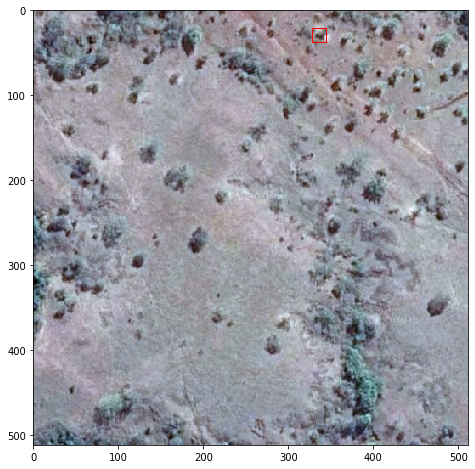

In [12]:
# let's take a look at one random patch from the whole map image
# category_id 1 is house with grass roof, 2 with iron roof and 3 for all kinds of roofs
score_thres = 0.1
image_id = result[0]['image_id']
fid = image_id.split('/')[-1].replace('.jpg', '')


image = cv2.imread(image_id)
image = np.ascontiguousarray(image)
score_thres = 0.1

bboxes = []
for res in result:
    if res['image_id'] == image_id and res['score'] > score_thres:
        bboxes.append(res['bbox'] + [res['category_id']])
        
bboxes = np.array(bboxes)
print(bboxes)

img = image.copy()

select_cat = 3

color = (255, 0, 0)

for box in bboxes:
    x0, y0, w, h, c = box
    x0 = int(x0)
    y0 = int(y0)
    w = int(w)
    h = int(h)
    x1 = x0 + w
    y1 = y0 + h
#     y0, x0, y1, x1 = box
#     print(box)
    if select_cat and select_cat == c:
        cv2.rectangle(img, (x0, y0), (x1, y1), color, 0, lineType=4)
    
plt.imshow(img)

In [13]:
# Convert the bounding box to csv file
dets = []
for res in result:
    image_id = res['image_id']
    fid = image_id.split('/')[-1].replace('.jpg', '')
    s_x, s_y = int(fid.split('_')[1]), int(fid.split('_')[2])
    
    if res['category_id'] in [1, 2] and res['score'] > score_thres:
        box = res['bbox']
        box[0] += s_x
        box[1] += s_y
        dets.append(res['bbox'] + [res['category_id']])
        
# specify the path where you want to save the csv file
save_path = 'result.csv'
dets = np.array(dets)
dets_pd_frame = pd.DataFrame(dets, columns=['PEXT_MIN_X', 'PEXT_MIN_Y', 'DeltaX', 'DeltaY', 'Roof'])
dets_pd_frame.Roof = dets_pd_frame.Roof.astype('int')
dets_pd_frame.to_csv(save_path, index=False)

In [14]:
dets_pd_frame

,PEXT_MIN_X,PEXT_MIN_Y,DeltaX,DeltaY,Roof
0,9634.44,10222.22,16.20,15.89,1
1,9634.44,10222.22,16.20,15.89,2
2,18873.80,2813.85,15.77,16.05,1
3,18906.04,2597.45,16.53,16.54,1
4,18785.69,2589.26,16.96,17.20,1
...,...,...,...,...,...
5504,16762.90,11394.60,14.54,14.53,2
5505,16726.49,11334.75,15.24,15.28,2
5506,1942.08,4126.97,15.77,15.37,1
5507,15605.88,17841.51,16.67,16.67,1
